In [1]:
import warnings
warnings.filterwarnings(action='ignore')

from glob import glob

from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def load_data(file, sheet_name):
    return pd.read_excel(file, sheet_name=sheet_name)

In [3]:
def load_all_data():
    files = glob('/Users/sabin/Documents/Project/뉴스와 소셜데이터 기반 이슈 분석 및 시각화/Trend-analysis/dataset/중대재해처벌법(40,056건)/*.xlsx')
    df = pd.DataFrame()
    for file in files:
        df = df.append(load_data(file, '뉴스-인기순'))
    return df

news_popular = load_all_data()

## 뉴스-인기순 Sheet

In [4]:
news_popular.isna().sum()

Unnamed: 0     0
Unnamed: 1     0
Unnamed: 2     0
Unnamed: 3     0
Unnamed: 4    13
dtype: int64

In [5]:
news_popular.columns = news_popular.iloc[0]
news_popular.drop(0, inplace=True, axis=0)
news_popular = news_popular.dropna(axis=0, how='any')
news_popular = news_popular[~news_popular['내용'].str.contains('http')]
news_popular = news_popular[news_popular['내용'].str.contains('[가-힣]')]
news_popular = news_popular[news_popular['내용'].str.len() < 1000]

print(news_popular.shape)
news_popular.head()

(9145, 5)


,작성일,작성자,댓글수,제목,내용
28,2021/06/20,YTN,455,"커지는 쿠팡 비판 목소리...""쿠팡 탈퇴"" 움직임까지",쿠팡 물류센터 화재로 쿠팡의 노동 환경과 김범석 창업자에 대한 비판이 커지면서 회원...
34,2021/05/01,연합뉴스,440,"민주 ""5월국회서 근로자의날, 노동절로 바꾸고 법정공휴일로""","근로자의 날 논평…""코로나19 계기 전환점, 노동시장 양극화 해소"" 더불어민주당 로..."
40,2021/01/08,연합뉴스,399,"추미애, 동부구치소 사태에 ""할 수 있는 조치 했다""",답변하는 추미애 법무부 장관 (서울=연합뉴스) 하사헌 기자 = 추미애 법무부 장관이...
46,2021/06/20,KBS,352,‘쿠팡 불매’ 여론도 확산…탈퇴 인증글도 속속,경기도 이천 덕평 쿠팡 물류센터에서 일어난 화재 뒤 쿠팡의 대응을 비판하며 불매를 ...
54,2021/08/26,서울신문,294,[단독] 부인이 왜 거기서 나와?,"이탄희 토론회, 李배우자 패널로 더불어민주당 이탄희 의원 더불어민주당 이탄희 의원이..."


## TF-IDF

In [6]:
def tfdif(corpus):
    cv = CountVectorizer(ngram_range=(1, 2), max_features=1000)
    document_term_matrix = cv.fit_transform(corpus)

    tf = pd.DataFrame(document_term_matrix.toarray(), columns=cv.get_feature_names())  # TF (Term Frequency)

    D = len(tf)
    df = tf.astype(bool).sum(axis=0)
    idf = np.log((D+1) / (df+1)) + 1             # IDF (Inverse Document Frequency)

    # TF-IDF (Term Frequency-Inverse Document Frequency)
    tfidf = tf * idf                      
    tfidf = tfidf / np.linalg.norm(tfidf, axis=1, keepdims=True)
    
    return tfidf


In [7]:
tfidf_news_popular = tfdif(news_popular['내용'])

In [8]:
tfidf_news_popular

,00,02,02 398,10,10시,10억원,10일,11일,12월,12일,...,확인됐다,확인하고,확인할,환경,활동을,회사,회의를,회장,회장은,후보는
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.103885,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.13503,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.214696,0.0,0.00000,0.0,0.0,0.227791,0.0
9141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.203311,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.0
9142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.0
9143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.0


In [9]:
import pickle

tfidf_news_popular.to_pickle('tfidf_news_popular.pkl')

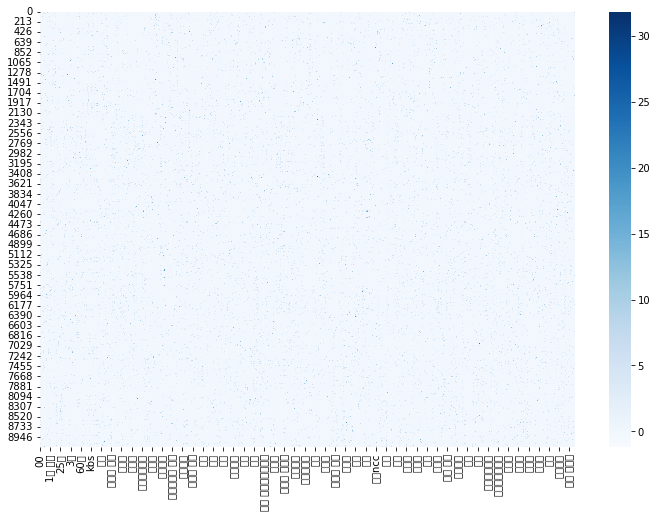

In [10]:
tfidf_news_popular = (tfidf_news_popular - tfidf_news_popular.mean()) / tfidf_news_popular.std()

# visualize

plt.figure(figsize=(12, 8))
sns.heatmap(tfidf_news_popular, cmap='Blues')
plt.show()


# TFDIF

We couldn't figure the relationship between the words linearly

as we can see in the graph above